# Evaluating Environmental Predictors of Breeding Waterfowl Populations in the Central Interior Plateau of British Columbia 

## Adventures in machine-learning and regression-based population models
![image](./images/overview_survey_area_extent.png)


### Overview - General Steps
1. Question - What is the distribution of species within the Central Interior Plateau? 
    * Identify main drivers
    * Identify areas of interest - diversity and abundance
    * Inform conservation planning
2. Data exploration and data wrangling
3. Identify analysis methods and tools
4. Perform analysis
5. Examine and refine


<a href="https://community.esri.com/groups/esri-training/blog/2018/10/19/use-the-five-step-gis-analysis-process"> <font size = -2>Modified from ESRI 5-Step GIS Analysis Process</font></a>


<style type="text/css">
.input_hidden{
    display: none
</style>

<style type="text/css"> # CSS hack to hide the cell input
.input_hidden{
    display: none


Issues tracking:

1. IRKernel loading packages from later version of R (3.5.3 instead of 3.5.1) - must change kernel spec as described here: https://github.com/IRkernel/IRkernel/issues/183


2. jupyterlab extension to close cells * requires installation of nodejs and npm 
    conda install nodejs
    conda install npm 
   
    - required update of pip
    - which required adding forge channel first:
        conda config --add channels conda-forge 
        conda update pip
     now
        conda install nodejs
        conda install npm
     but required update of core-js with 
         npm install --save core-js@^3
     
     then follow: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html and run
         conda install -c conda-forge jupyter_contrib_nbextensions
     then 
         jupyter contrib nbextension install --sys-prefix # for system wide esp. useful in virtual env
     then enable the path but first list available Jupyter paths 
         jupyter --paths

     Check jupyterlab extensions with 
        jupyter nbextension list
    
    }
</style>


In [35]:
# Housekeeping - manage packages 
version
Packages <- c("tidyverse", "gganimate", "RColorBrewer", "reshape2", "gridExtra", "tidyverse",
             "repr", "knitr", "tsibble")
# # Install packages if not installed 
# if (!require("pacman")) install.packages("pacman")
#     pacman::p_load(Packages)

lapply(Packages, require, character.only=TRUE)
# (.packages)() # List loaded packages

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          5.1                         
year           2018                        
month          07                          
day            02                          
svn rev        74947                       
language       R                           
version.string R version 3.5.1 (2018-07-02)
nickname       Feather Spray               

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

Here is a look at the (semi-processed) survey data--the head and tail views of the data frame.

In [36]:
df <- read.csv("iws_pts_filtered_20190620.csv")

head(df)
tail(df)
records <- nrow(df)
print(paste("Total records: ", records))

date_,year_,month_,day_,lon,lat,species,x_alb,y_alb,sp_name,...,eco,trans_id,Ecosection_2pt1,prev_trans,Ecosection_1995,unknown_BoN_combo,Total_Count,Total_IBP_Formula,Total_Count_Formula,pop
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,...,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>
39209,2007,5,7,-122.8230,53.30426,CAGO,1211186,926711.1,Canada Goose,...,QUL,16,Quesnel Lowland,B07,Quesnel Lowland,1,1,2* [pair]+ [unknownSex],Total_IBP+ [mixed_m] + [mixed_f],1
39211,2007,5,9,-122.6088,53.01350,AMWI,1226964,894968.8,American Wigeon,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,9,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],6
39211,2007,5,9,-122.6088,53.01350,CAGO,1226964,894968.8,Canada Goose,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,1,1,2* [pair]+ [unknownSex],Total_IBP+ [mixed_m] + [mixed_f],1
39211,2007,5,9,-122.6088,53.01350,GWTE,1226964,894968.8,Green-winged Teal,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,4,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],4
39211,2007,5,9,-122.6088,53.01350,MALL,1226964,894968.8,Mallard,...,QUL,14,Quesnel Lowland,B09,Quesnel Lowland,0,6,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],0
39223,2007,5,21,-124.4701,54.31847,GWTE,1099279,1036228.4,Green-winged Teal,...,BAU,23,Babine Upland,A10,Babine Upland,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2


,date_,year_,month_,day_,lon,lat,species,x_alb,y_alb,sp_name,...,eco,trans_id,Ecosection_2pt1,prev_trans,Ecosection_1995,unknown_BoN_combo,Total_Count,Total_IBP_Formula,Total_Count_Formula,pop
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,...,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>
32848,42866,2017,5,11,-124.3120,52.14455,GWTE,NA,NA,Green-Winged Teal,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32849,42866,2017,5,11,-124.3104,52.14597,RNDU,NA,NA,Ring-necked Duck,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,1,1 * [lone_m] +2* [pair] + [m2]*2 + [m3]*3 + [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],1
32850,42866,2017,5,11,-124.3804,52.14530,NOSL,NA,NA,Northern Shoveler,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32851,42866,2017,5,11,-124.3804,52.14530,MALL,NA,NA,Mallard,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32852,42866,2017,5,11,-124.3793,52.14648,GWTE,NA,NA,Green-Winged Teal,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2
32853,42866,2017,5,11,-124.3977,52.14375,MALL,NA,NA,Mallard,...,CHP,8,Chilcotin Plateau,C05,Chilcotin Plateau,0,2,2*[lone_m] +2* [pair] + 2* [m2]*2 +2* [m3]*3 + 2* [m4]*4,Total_IBP+ [mixed_m] + [mixed_f],2


[1] "Total records:  32853"


### Data Exploration - Species Observation Records

In [67]:
# Load the processed data in wide format
iws <- read.csv("id1_400_years.csv")

# Reshape to long form
df <- gather(iws,"sp_id", "pop", amwi:wodu)
df$sp_id <- toupper(df$sp_id) # Species codes to uppercase


In [38]:
n_sp <- unique(df$sp_id)

sp <- df %>%
    group_by(sp_id) %>%
    summarise(Population = sum(pop))

sp_top_5 <- sp %>%
    arrange(desc(Population))%>%
    top_n(5)

sp_bot_5 <- sp %>%
    arrange(Population)%>%
    top_n(-5)

sp_top_10 <- sp %>%
    arrange(desc(Population))%>%
    top_n(10)


Selecting by Population
Selecting by Population
Selecting by Population


In [51]:
print(paste("Total distinct species of waterfowl : ",length(n_sp)))
print("5 MOST common species:")
sp_top_5
print("5 LEAST common species:") 
sp_bot_5

[1] "Total distinct species of waterfowl :  27"
[1] "5 MOST common species:"


sp_id,Population
<chr>,<int>
MALL,18898
RNDU,11079
BUFF,9672
CAGO,9578
GWTE,7608


[1] "5 LEAST common species:"


sp_id,Population
<chr>,<int>
SWAN,2
HADU,6
SNGO,16
RBME,18
COGO,26


Plot the top 15 most common species.

Selecting by Population


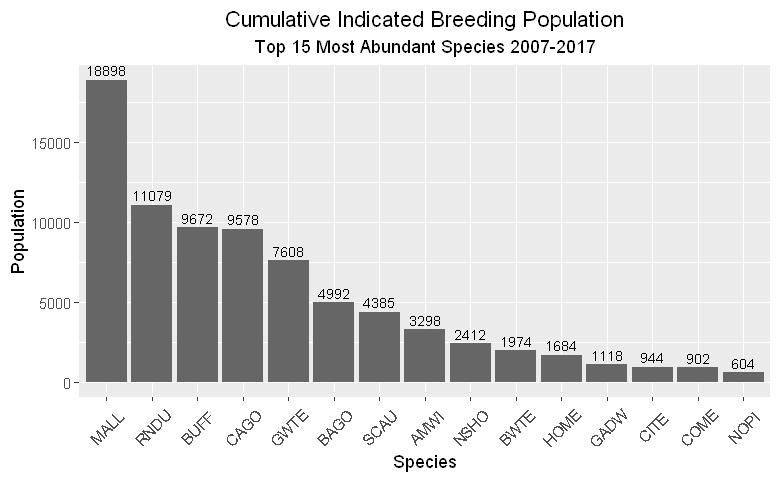

In [40]:
sp <- df %>% 
    group_by(sp_id) %>% 
    summarise(Population = sum(pop)) %>% 
    arrange(desc(Population)) %>% 
    top_n(15)
# sp
p <- ggplot(data = sp, aes(x = reorder(sp_id, -Population), y = Population)) + geom_bar(stat = "identity", 
    fill = "gray40") + ggtitle("Cumulative Indicated Breeding Population", subtitle = "Top 15 Most Abundant Species 2007-2017") + 
    xlab("Species") + geom_text(aes(label = Population), size = 3, hjust = 0.5, vjust = -0.4) + 
    theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5), 
        axis.text.x = element_text(angle = 45, vjust = 0.5))
options(repr.plot.width = 6.5, repr.plot.height = 4)
p

What is the distribution of species within ecosections?

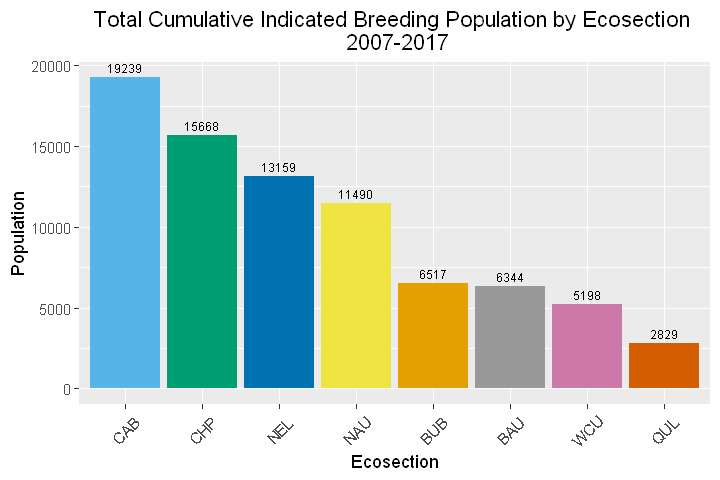

In [54]:
eco_sp <- df %>% 
    group_by(eco) %>% 
    summarise(Population = sum(pop)) %>% 
    arrange(desc(Population))

# Create a custom colour-blind-friendly scale
library(RColorBrewer)
cbp1 <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", 
    "#CC79A7")

names(cbp1) <- levels(eco_sp$eco)
colFill <- scale_fill_manual(names(cbp1), values = cbp1)
colColour <- scale_colour_manual(name = "ECO", names(cbp1), values = cbp1)

g <- ggplot(eco_sp, aes(x = reorder(eco, -Population), y = Population, fill = eco)) + 
    geom_bar(stat = "identity") + ggtitle("Total Cumulative Indicated Breeding Population by Ecosection \n 2007-2017") + 
    xlab("Ecosection") + labs(color = "Ecosection") + colFill + geom_text(aes(label = Population), 
    size = 2.5, hjust = 0.5, vjust = -0.5) + theme(axis.text.x = element_text(angle = 45, 
    vjust = 0.5), plot.title = element_text(hjust = 0.5), legend.position = "none")
options(repr.plot.width = 6, repr.plot.height = 4)
g

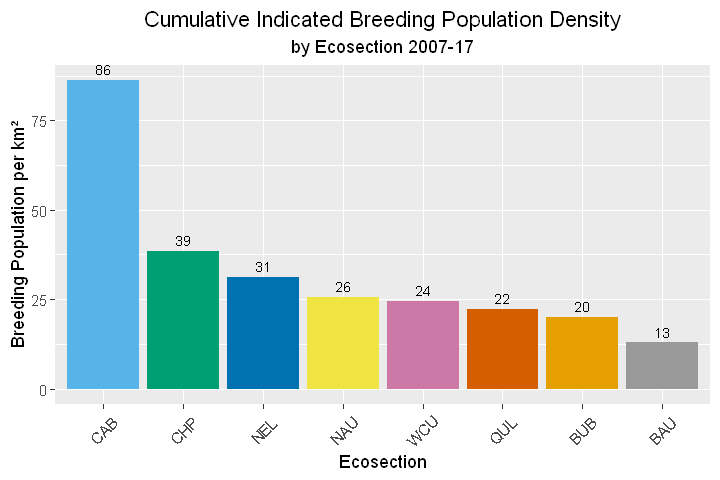

In [42]:
eco_area <- read.csv("eco_transect_area_summary.csv")
eco_p <- merge(eco_sp, eco_area)
eco_p$p_density <- eco_p$Population/eco_p$area_surveyed*100

g <- ggplot(eco_p, aes(x=reorder(eco, -p_density),y=p_density, fill=eco)) + geom_bar(stat="identity") + 

    ggtitle(label="Cumulative Indicated Breeding Population Density", subtitle="by Ecosection 2007-17") + colFill +
    geom_text(aes(label=round(p_density, digits=0)), size=3, hjust=0.5, vjust=-0.5) +
    xlab("Ecosection") + ylab("Breeding Population per km²") + 
    theme(axis.text.x = element_text(angle=45,vjust=.5), 
        plot.title = element_text(hjust=0.5),
        plot.subtitle = element_text(hjust=0.5), 
        legend.position = "none")
options(repr.plot.width=6,repr.plot.height=4)
g


The Cariboo Basin (CAB) is clearly a very important Ecosection for breeding waterfowl populations especially when taking the Ecosection area into account as visualized by population density. How does the population density vary through time?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


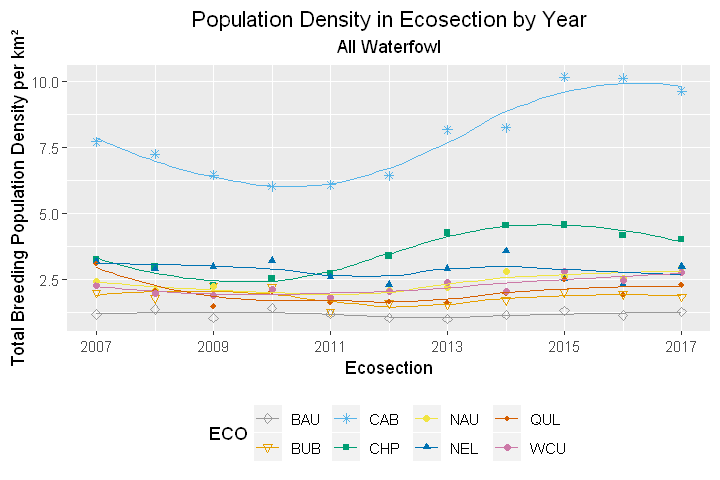

In [43]:
eco_yr <- df %>% 
    group_by(eco, year_) %>% 
    summarise(pop = sum(pop)) %>% 
    left_join(., eco_area, by = "eco") %>% 
    mutate(density = pop/area_surveyed * 100)

shp1 <- c(5, 6, 8, 15:19)
colShape <- scale_shape_manual(name = "ECO", names(cbp1), values = shp1)

# #Plot the outcome
g <- ggplot(eco_yr, aes(year_, density, colour = eco, shape = eco)) + ggtitle("Population Density in Ecosection by Year", 
    subtitle = "All Waterfowl") + geom_point() + colShape + 
    colColour + theme(legend.position = "bottom", legend.direction = "horizontal", 
    legend.box = "vertical", axis.text.x = element_text(hjust = 0.5), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5)) + xlab("Ecosection") + ylab("Total Breeding Population Density per km²") + 
    scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))
options(repr.plot.width = 6, repr.plot.height = 4)
g + geom_smooth(size = 0.5, se = F)

#### Temporal animations can provide a different perspective. Animated lines, dots and bar charts below. I got carried away obviously and they're distracting but kinda fun. 
  

In [44]:
## 'gganimate' Line chart with dots using 'transition_reveal'
# library(gganimate)
# g <- ggplot(eco_yr, aes(year_, density, group = eco, shape = eco, colour = eco)) + labs(title = "Population Density in Ecosection by Year") + 
#     geom_point(size = 4) + geom_line(size = 0.5) + colShape + colColour + theme(legend.position = "bottom", 
#     axis.text.x = element_text(angle = 45, vjust = 0.5), plot.title = element_text(hjust = 0.5), 
#     plot.subtitle = element_text(hjust = 0.5, size = 17)) + scale_size(guide = FALSE) + 
#     xlab("Ecosection") + ylab("Total Breeding Population Density per km²")
# g + geom_point((aes(group = seq_along(year_), size = 2))) + transition_reveal(year_) + 
#     labs(subtitle = "{frame_along}")

# ## Dot plot with 'shadow_wake' and 'transition_time'
# g <- ggplot(eco_yr, aes(eco, density, size = density, colour = eco)) + geom_point(size = 9) + 
#     colColour + ggtitle(label = "Population Density in Ecosection by Year") + theme(legend.position = "bottom", 
#     axis.text.x = element_text(angle = 45, vjust = 0.5, size = 9), plot.title = element_text(hjust = 0.5), 
#     plot.subtitle = element_text(hjust = 0.5, size = 17)) + xlab("Ecosection") + 
#     ylab("Total Breeding Population Density per km²")
# g + transition_time(year_) + labs(subtitle = "{frame_time}") + shadow_wake(wake_length = 0.2, 
#     alpha = FALSE)

# ## Bar chart with 'transition_time'
# g <- ggplot(eco_yr, aes(eco, density, fill = eco)) + geom_bar(stat = "identity") + 
#     colFill + theme(legend.position = "bottom", legend.direction = "horizontal", 
#     legend.box = "vertical", axis.text.x = element_text(angle = 45, vjust = 0.5, 
#         size = 9), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
#         size = 17)) + xlab("Ecosection") + ylab("Total Breeding Population Density per km²")
# g + transition_time(year_) + labs(title = "Population Density in Ecosection by Year", 
#     subtitle = "{frame_time}")

![SegmentLocal](./images/popd_eco_yr_line.gif "segment")

![SegmentLocal](./images/popd_eco_yr_bar.gif "segment")

## PLACEHOLDER FOR DISCUSSION OF POPULATION TRENDS. 
The central and northernmost ecosections in the study area Babine Upland, Western Chilcotin Upland, Nazko Upland, Quesnel Lowland and Nechako Lowland have the most stable populations with only slight fluctuations year to year--the lattermost fluctuating more than the others. In constrast, the southernmost neighbours, Cariboo Basin and Chilcotin Plateau, mirror year to year trends, increasing and decreasing in synchrony while sharing moderately increasing trends over the study period. The populations in Nechako Lowland, while remaining stable over the study period, fluctuate in the opposite direction from Cariboo Basin and Chilocotin Plateau with the exception of years 2012 to 2014 when all increased.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'


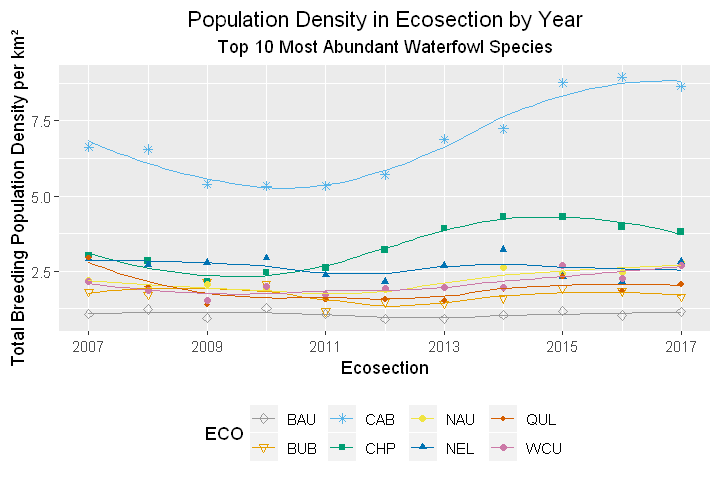

In [56]:
# Top 10 Species only
sp_10 <- factor(sp_top_10$sp_id) # Unless factor original 31 levels are retained
sp_10_yr <- df %>% 
    filter(sp_id %in% sp_10) %>%
    group_by(eco, year_) %>% 
    summarise(pop = sum(pop)) %>% 
    left_join(., eco_area, by = "eco") %>% 
    mutate(density = pop/area_surveyed*100)

# #Plot the outcome
h <- ggplot(sp_10_yr, aes(year_, density, colour = eco, shape = eco)) + ggtitle("Population Density in Ecosection by Year", 
    subtitle = "Top 10 Most Abundant Waterfowl Species") + geom_point() + colShape + 
    colColour + theme(legend.position = "bottom", legend.direction = "horizontal", 
    legend.box = "vertical", axis.text.x = element_text(hjust = 0.5), plot.title = element_text(hjust = 0.5), 
    plot.subtitle = element_text(hjust = 0.5)) + xlab("Ecosection") + ylab("Total Breeding Population Density per km²") + 
    scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))
options(repr.plot.width = 6, repr.plot.height = 4)
h + geom_smooth(method = "auto", size = 0.5, se = F)

In [68]:
library(repr) # Plot sizes in Jupyter wrapper for R 
eco_sp_yr <- df %>%
    filter(sp_id %in% sp_10) %>%
    group_by(eco, year_, sp_id)%>%
    summarise(Population = sum(pop))%>%
    left_join(., eco_area, by = "eco") %>%
    mutate(Population, density = Population/area_surveyed*100)
head(eco_sp_yr)

eco,year_,sp_id,Population,total_area_ha,area_surveyed,pct_tot_area,pct_area_surveyed,density
<fct>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BAU,2007,AMWI,14,1961719,48959.75,0.1831068,0.1848207,0.028594917
BAU,2007,BAGO,104,1961719,48959.75,0.1831068,0.1848207,0.212419387
BAU,2007,BUFF,68,1961719,48959.75,0.1831068,0.1848207,0.138889599
BAU,2007,BWTE,4,1961719,48959.75,0.1831068,0.1848207,0.008169976
BAU,2007,CAGO,24,1961719,48959.75,0.1831068,0.1848207,0.049019858
BAU,2007,GWTE,52,1961719,48959.75,0.1831068,0.1848207,0.106209693


Visualize and compare distributions of the top most common species

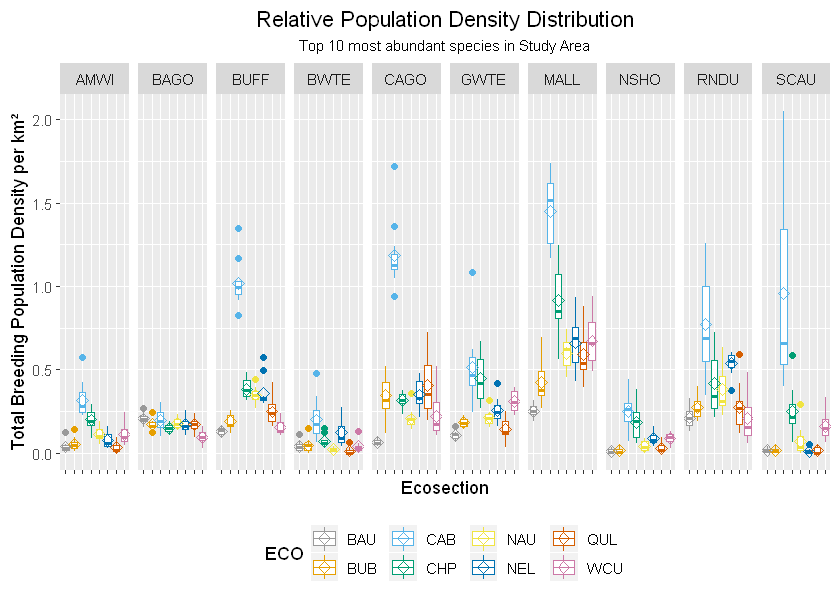

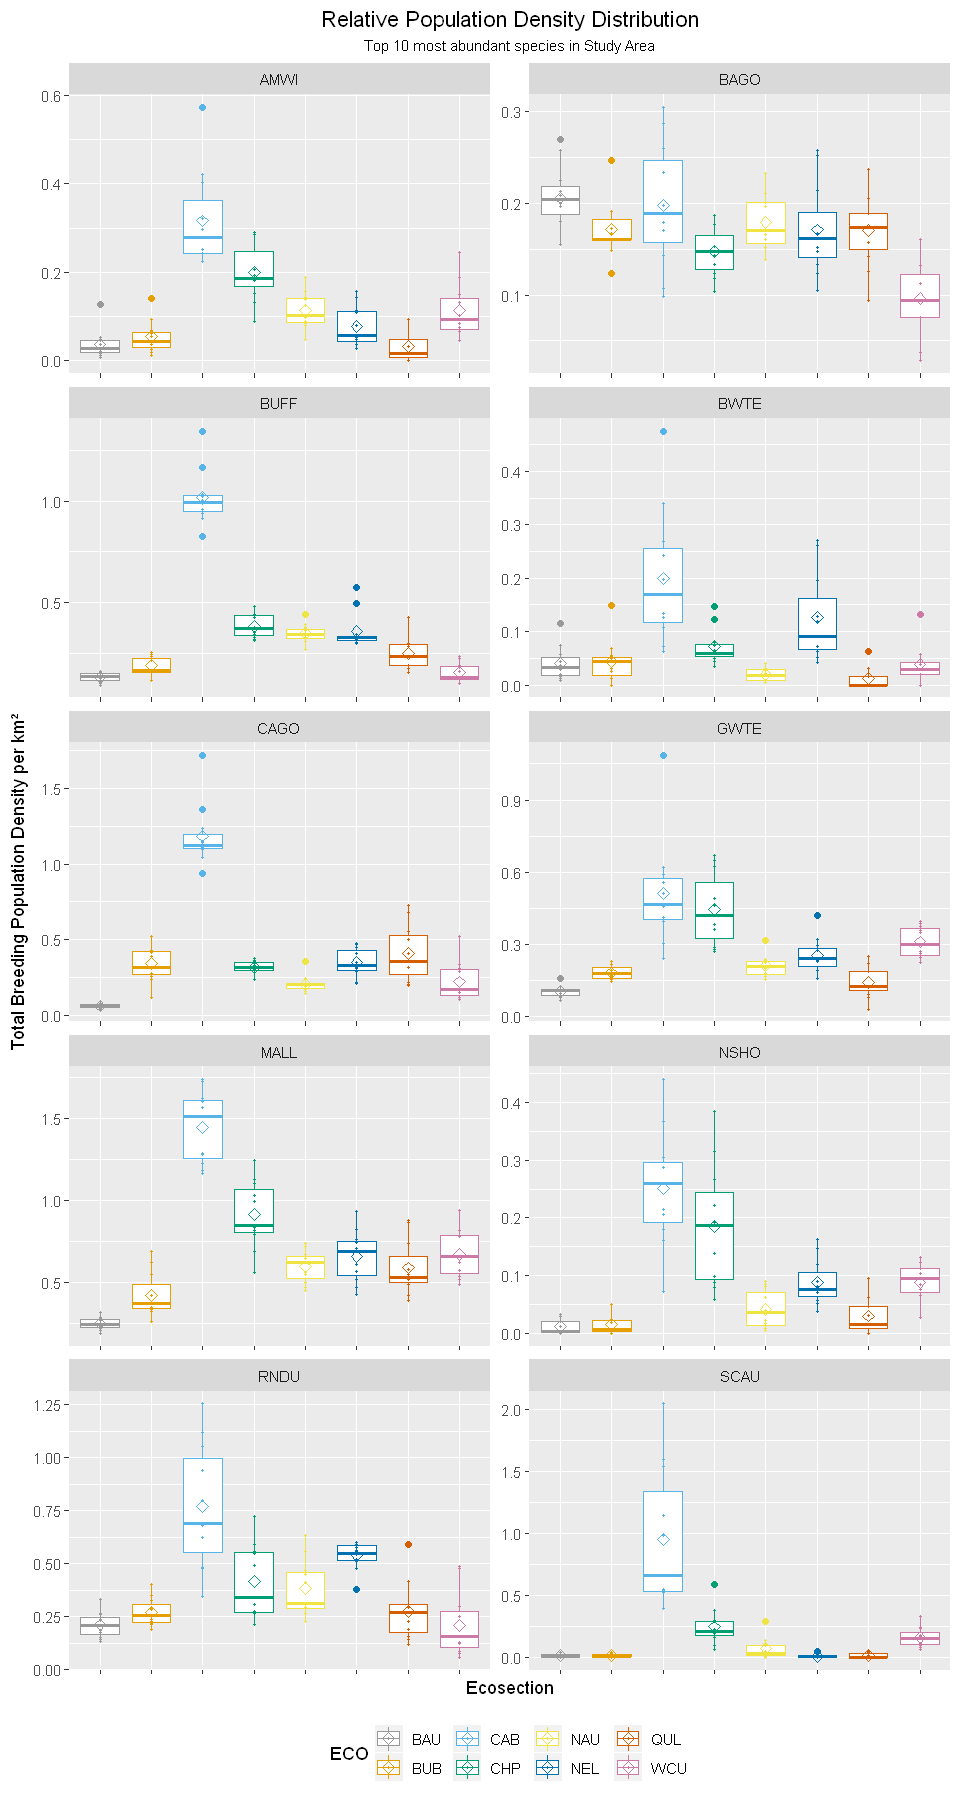

In [64]:
bp <- ggplot(eco_sp_yr, aes(x = eco, y = density, colour = eco)) + geom_boxplot() + 
    colColour + ggtitle(label = "Relative Population Density Distribution", subtitle = "Top 10 most abundant species in Study Area") + 
    theme(legend.position = "bottom", legend.direction = "horizontal", legend.box = "vertical", 
        axis.text.x = element_blank(), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
            size = 9)) + ylab("Total Breeding Population Density per km²") + xlab("Ecosection") + 
    stat_summary(fun.y = mean, geom = "point", shape = 5, size = 2)  # Add means

options(repr.plot.width = 7, repr.plot.height = 5)
bp + facet_wrap(. ~ sp_id, ncol = 13)

# Display with dynamic scale ranges
options(repr.plot.width = 8, repr.plot.height = 15)
bp + facet_wrap(. ~ sp_id, ncol = 2, scales = "free") + geom_point(size = 0.4) 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


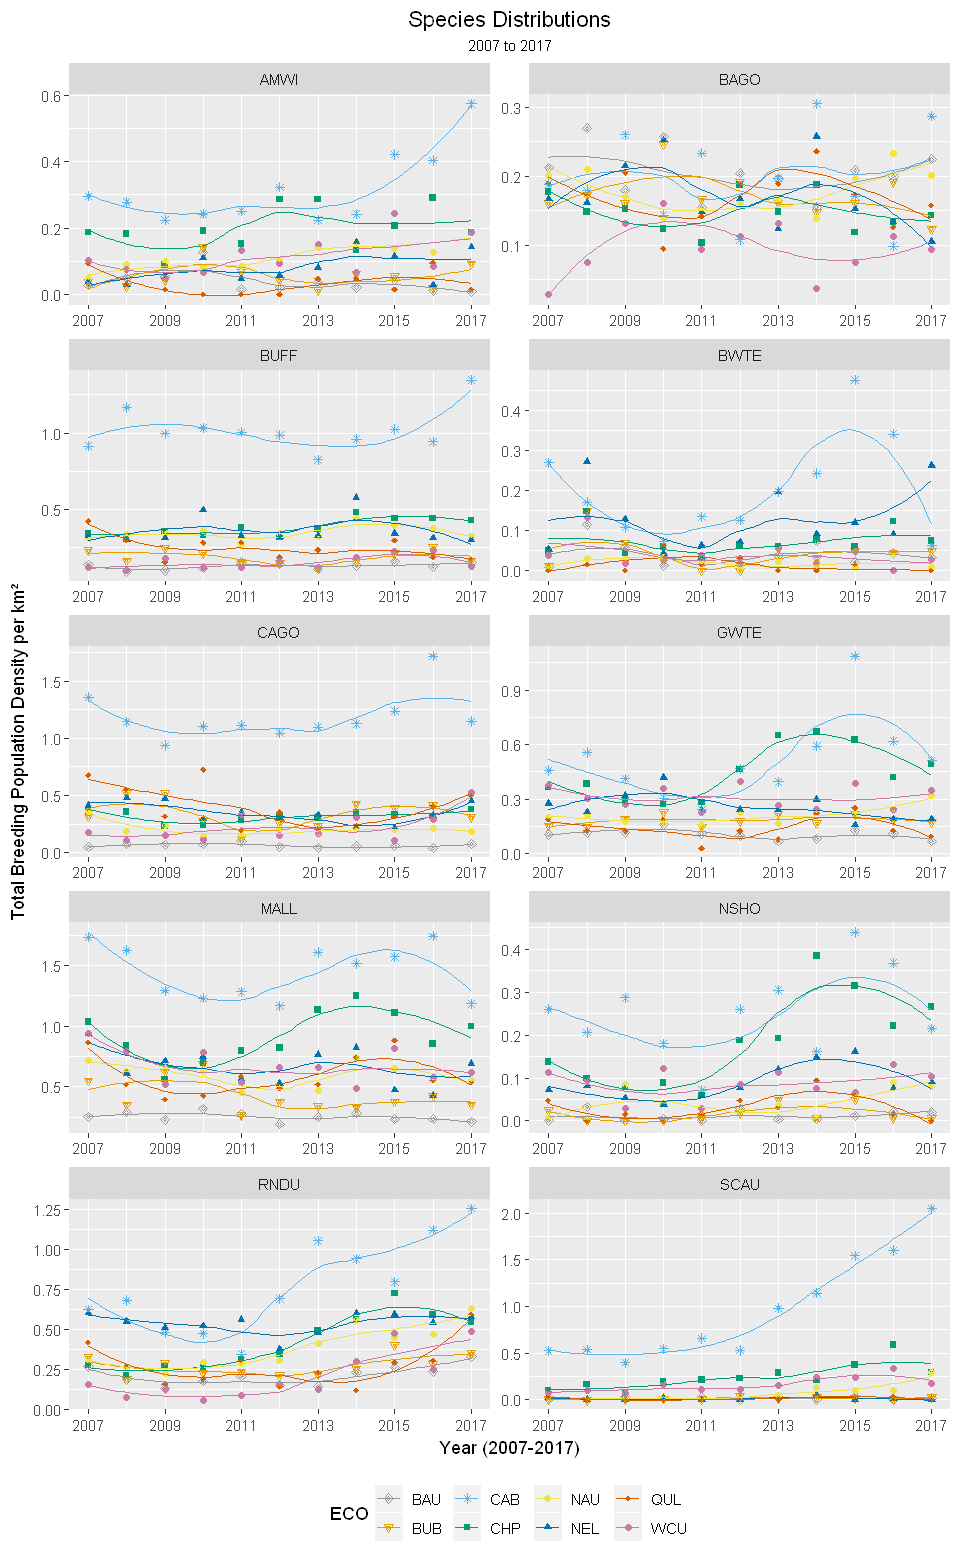

In [71]:
sp_yr <- ggplot(eco_sp_yr, aes(x = year_, y = density, colour = eco, shape = eco)) + 
    geom_point() + geom_smooth(size = 0.5, method = "auto", se = FALSE) + colShape + 
    colColour + ggtitle(label = "Species Distributions", subtitle = "2007 to 2017") + 
    theme(legend.position = "bottom", legend.direction = "horizontal", legend.box = "vertical", 
        plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5, 
            size = 9)) + ylab("Total Breeding Population Density per km²") + xlab("Year (2007-2017)")

# Display with dynamic scale ranges
options(repr.plot.width = 8, repr.plot.height = 13)
sp_yr + facet_wrap(. ~ sp_id, ncol = 2, scales = "free") + geom_point(size = 0.4) + 
    scale_x_continuous(breaks = c(2007, 2009, 2011, 2013, 2015, 2017))

## PLACEHOLDER FOR DISCUSSION OF SPECIES-SPECIFIC POPULATION TRENDS
The distributions of the ten most common species suggest it is Lesser Scaup* (LESC) and Ring-necked Duck (RNDU) species driving the increasing population trends in the Cariboo Basin and the Chilcotin Plateau.  Mallard (MALL), Canada Goose (CAGO), Green-Winged Teal (GWTE), Blue-Winged Teal (BWTE), Northern Shoveler (NOSH) and Canada Goose (CAGO) reflect directionally similar year to year fluctuations--decreasing from 2007 to 2010, increasing between 2010 and 2015, and decreasing again to 2017. American Wigeon (AMWI) to a lesser degree follows the main trend but appears to be slightly increasing in the Cariboo Basin. Barrow's Goldeneye (BAGO) distributions remain steady throughout their distributions in all ecosections.

<sub>*Note the WBPHS does not distinguish between Lesser and Greater Scaup species and are recorded as generic SCAU however only the former regularly occur in this area.</sub>



In [73]:
# Get a table listing of the top 10 most common species in each ecosection
# sp_id contains species guilds as well as single species
iws_wide <- read.csv("id1_400_years.csv")
sp_long <- iws_wide[,1:grep("wodu", colnames(iws_wide))] %>%
    gather(sp_id, pop, amwi:wodu) %>%
    group_by(eco, sp_id)%>%
    summarise(pop=sum(pop))%>%
    group_by(eco)%>%
    mutate(ranks = dense_rank(desc(pop)))%>%
    filter(ranks<=10)%>%
    dplyr::select(-c(pop))%>%
    spread(eco, sp_id) %>%
    group_by(ranks)

print("Top 10 Cumulatively Most Abundant Species within each Ecosection")
# function to convert lowercase to upper
sp_long <- data.frame(lapply(sp_long, function(v) {
  if (is.character(v)) return(toupper(v))
  else return(v)
}))
sp_long

[1] "Top 10 Cumulatively Most Abundant Species within each Ecosection"


ranks,BAU,BUB,CAB,CHP,NAU,NEL,QUL,WCU
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,MALL,MALL,MALL,MALL,MALL,MALL,MALL,MALL
2,RNDU,CAGO,CAGO,GWTE,RNDU,RNDU,CAGO,GWTE
3,BAGO,RNDU,BUFF,RNDU,BUFF,BUFF,RNDU,CAGO
4,BUFF,BUFF,SCAU,BUFF,GWTE,CAGO,BUFF,RNDU
5,GWTE,GWTE,RNDU,CAGO,CAGO,GWTE,BAGO,SCAU
6,CAGO,BAGO,GWTE,SCAU,BAGO,BAGO,GWTE,BUFF
7,COME,AMWI,GADW,AMWI,AMWI,BWTE,HOME,AMWI
8,HOME,HOME,AMWI,NSHO,HOME,HOME,AMWI,BAGO
9,BWTE,COME,NSHO,BAGO,SCAU,NSHO,NSHO,NSHO


In [ ]:
# Animation of facet_grid scatterplot - too dizzying really.

g <- ggplot(eco_sp_yr, (aes(x = eco ,y = density, size = density, colour=eco))) +
    ggtitle("Population Density in Ecosection by Year") +
      geom_point() + colColour + theme(legend.position="bottom",legend.direction = "horizontal", legend.box="vertical", 
                                  axis.text.x = element_blank(), 
                                    plot.title = element_text(hjust = 0.5),
                                    plot.subtitle = element_text(hjust=0.5, size=17))+ 
       xlab("Ecosection") + ylab("Total Breeding Population Density per ha")


g + facet_wrap(. ~ toupper(sp_id), ncol=3) + transition_time(year_) + labs(subtitle = '{frame_time}')

## Evaluation of Modelling Approaches and Data Inputs

Points of consideration for the modelling framework, data inputs, and their interactions

#### Data Properties
* Accuracy and uncertainty
* Data acquisition and availability
* Logical consistency and timeliness
* Scale, extent and resolution 
* Direct vs Indirect 
* Mechanisitic vs correlated 
* Ecological and physiological

####  Model Properties
* Predictive vs Explanatory (Random Forest and Regression-based approaches)
* Intepretation - scale of analyses and applications

<img src="./images/modeling_guisan.png" alt="Drawing"/>


## Waterfowl Survey Observation data
##### Weaknesses
* Positional uncertainty of observation data
* Inconsistency of survey methods - technological change
* Survey conditions (climate and weather-dependent, pilot experience)
* Relative coverage - 400m wide strip transects spaced 10 miles apart (~2.5% study area)
* Inconsistent with methods of North American Breeding Waterfowl Habitat and Population Survey (1955-present)

##### Strengths
* Consistent and highly experienced observers 
* Continuous, annual basis since 2006 
* Large database ~ 30,000+ 
* Large extent ~ 10,000,000+ ha (~40,000+ sq miles)


<img src="./images/overview_observations.png" alt="Drawing" style="width: 400px;"/>

## Explanatory Predictor Candidates
#### Climate
* Growing Degree Days - Primary Productivity
* Precipitation as Snow - Hydrology is driven by snowpack 
* Spring Temperature - Timing of freshet
* Heat Moisture Index - (MAT+10)/(MAP/1000) 

#### Landscape
* Topography - aspect, slope, elevation
* Landcover - readily available interpreted data product (CEC 2010)
* Disturbance - roads atlas, fire database, Mountain Pine Beetle 
* Wetland habitat - lakes, rivers, wetlands
    * smaller wetlands <10 ha ≈ increased productivity
    * data creation driven by forestry industry
    
#### Land management
* Agricultural Land Reserve
* Protected Areas
* Tenure

<sub>See 'data_dictionary.xlsx'</sub>

## PLACEHOLDER PREDICTOR SURFACES - IMAGES 

## PLACEHOLDER  PREDICTORS  - DISCUSSION

## Random Forest - Overview of steps
1. Random forest approach selected for predictive power
2. Tool selection
    * 'cforest' party package - conditional inference trees
    * 'randomForest' - favours continuous variables and variables with many categories
    * 'Forest-based Classification and Regression' ArcGIS Pro v2.2+
3. Variable selection
4. Data processing
5. Model evaluation
     * Model stability
     * Model accuracy
6. Refine Model and repeat #5 Model evaluation

<a href=https://core.ac.uk/download/pdf/12170130.pdf><div style="text-align: right"> <font size = -1>Strobl et al, 2009</font> </div></a>  

![image](./images/random_forest_diagram_complete_vankar_jaganath_cc.png) 
<div style="text-align: right"> <sub> cc Vankar Jaganath <sub> </div>

### Variable Selection 
##### Ecological considerations and issues
* Climate normals vs mean vs timeliness - response lag
* Species breeding philopatry
* Density-dependence and interspecific competition
* Wintering conditions
##### Addressing correlation, collinearity and variance inflation
* High degree of correlation in climate and ecology 
* Imbalanced classes of predictor variables
* Spatial variability
* *Scale



#### Example collinearity - Climate
* Correlation thresholds:
    * < 0.7 (Green, 1979) 
    * < 0.8 (Menard, 2002)
* Multicollinearity - correlation between 3+ variables even when pair-wise correlation is absent
    * critical threshold 5-10 (Guisan et al, 2017)
    * VIF threshold < 5 


In [ ]:
## Address Correlations, Multicollinearity and VIF
Packages <- c('Hmisc', 'corrplot', 'car')
lapply(Packages, require, character.only=TRUE)
iws_wide <- read.csv("id1_400_years.csv")
# Example climate variable selection
# pairwise correlations with 'rcorr'
clim_var <- iws_wide[,grep("mean_ahm", colnames(iws_wide)):grep("mean_shm", colnames(iws_wide))]
# Set plot size
options(repr.plot.width=8, repr.plot.height=8)
#Check correlations
corr <- rcorr(as.matrix(clim_var))
corrplot(corr$r, method='ellipse', number.cex= 10/ncol(df))


Filter candidates identifying key drivers: snowpack, growing degree days (DD5), moisture index

In [ ]:
library(dplyr)
# Subset
# grep("mean_shm", colnames(iws_wide))
# grep("mean_pas_wt", colnames(iws_wide))
# grep("mean_dd5", colnames(iws_wide))

clim_var_1 <- iws_wide[,c(76, 77, 67)]

# Set plot size
options(repr.plot.width=8, repr.plot.height=5)

# Check correlations
# Set plot size
corr <- rcorr(as.matrix(clim_var_1))
corrplot(corr$r, method='number', number.cex= 10/ncol(df))
str(clim_var_1)


#### Correlation and multicollinearity of the candidate long-lists
![image](./images/corr_clim_ellipse.png)
![image](./images/corr_landscape_ellipse.png)
![image](./images/vif_eco_incl_needleleaf.png)

## PLACEHOLDER FOR CANDIDATE VARIABLES

In [ ]:
# Assess multicollinearity
library(usdm)

v <- vif(clim_var_1)
vm <- v$VIF
names(vm) <- v$Variables
str(vm)
dotchart(vm[order(vm)], cex = 0.6, pch = 19,
         gcolor = "#999999",
         xlab = "varImp")

##  PLACEHOLDER cforest model run example

### Random Forest Model Evaluation
cforest_unbiased
    * can handle correlated predictors 
    * computationally intensive 
    * preliminary model runs without filtering correlated variables ~ 240+ hours
##### Model Stability - Variable Important Measures (varimp)
* Subset data into training, validate and test subsets (70, 30, 30%)
* Run models with different seeds
* Compare ranks of varimp ('SuperRanker') 
* Evaluate 

![image](./images/varimp_multi.png)


<sub>Toggle cell below for model evalution code - note raw data not included in notebook<sub>

In [ ]:
# Sequential rank agreement methods for comparison of ranked lists
# https://github.com/tagteam/SuperRanker

fgcRequire <- function(pkg) {
  if(pkg %in% rownames(installed.packages()) == FALSE) {
    install.packages(pkg)
  }
}

fgcRequire("devtools")
library(devtools)

install_github('TagTeam/SuperRanker')
library(SuperRanker)  # For the SuperRanker package
wd <- "../eco_CAB/"
wdA <- paste0(wd,"results-seed-47")
wdB <- paste0(wd,"results-seed-742938")
wdC <- paste0(wd,"results-seed-42")
              
af <- list.files(wdA, "*.csv$")
bf <- list.files(wdB, "*.csv$")
cf <- list.files(wdB, "*.csv$")

if (length(intersect(af,bf)) != length(bf)) { 
  print("unpaired input sets")
  return()
}

f <-  af[1] # DEBUG

err <- as.data.frame(sapply(af, 
#tErr <- sapply(af, 
function(f) {
  setwd(wdA)
  a <- read.csv(f)
  sa <- order(a$vi, decreasing = TRUE)
  
  setwd(wdB)
  b <- read.csv(f)
  sb <- order(b$vi, decreasing = TRUE)
  
  setwd(wdC)
  c <- read.csv(f)
  sc <- order(b$vi, decreasing = TRUE)
  

  i <- cbind(sa,sb,sc)
  mlist <- matrix(i,ncol=3)
  #rank <- overlap(mlist)
  rank <- smooth_sra(mlist)
  
  print(paste("Result:", f))
  #print(rank)
  #print(rank)
  ul <- cbind(rank$lower,rank$upper)
  
  #r <- ul[1,] # DEBUG
  e <- apply(ul, 1, function(r) {
    return(abs(r[1] - r[2]))
  })
  
  print(paste("Error:"))
  print(e)
  
  m <- mean(e)
  return(c(m,e))
})
)


## PLACEHOLDER Refined model after assessing VARIMP filtering 

## PLACEHOLDER Accuracy Assessment

## PLACEHOLDER Model Predictions

![image](.images/cab_layout_MALL.png)
![image](./images/cab_layout_BAGO.png)
![image](./images/cab_layout_LESC.png)

## Regression-based  - Overview of steps
1. Generalized Linear Mixed Models approach
    * Allows for variable response distributions - Poisson, Gamma, etc
    * Zero-inflation (16ha spatial and yearly scale ~ 92% records recorded 0)
    * Fixed and random effects
    * Flexible, efficient
2. Tool selection
    * R packages: lme4, glmmTMB
3. Variable selection 
    * Identified in Random Forest modeling - but collinearity MUST be addressed
4. Data processing
    * Identify response distribution 
    * Standardization 
5. Model evaluation
     * Model stability
     * Model accuracy
6. Refine Model
    * Assess model performance (see Points to Consider #1 below)
  


## PLACEHOLDER FREQUENCY DISTRIBUTION PLOTS OF COUNTS WITHIN 16HA GRID CELL

## Tools and technologies

* Jupyter notebook - computational notebook 
* tidyverse - family of R packages sharing a common syntax (dplyr, ggplot2, purr, tidyr, etc) 
* rpy2 - interface to R from within Python - switch between R and Python with R magics 
* R-ArcGIS Bridge - interface ArcGIS and R (R v 3.2.2+, Python Script Toolbox
* R-markdown
* Python Toolbox -  

# QUESTIONS/POINTS TO CONSIDER
1. Assessing model performance - train, validate, test - can be supplanted with resampling procedures:
    1. assess with resubstitution run model results against the training dataset 
        * goodness of fit, but no assessment of predictive ability against independent data
        * assess normality of residuals
        * assess fit of distributions (e.g. Komogorov-Smirnov)
    2. assess by randomization (permutation)
        * randomize the training data through resampling without substitution of the response or predictor variables
        * fit new model with the randomized dataset and repeat ~1000x then assess the probability the model measures (e.g. response/coefficient or model fit) could occur purely by chance out of all the runs (permutation-based p-values)***THIS IS WHAT THE PERMUTATION IMPORTANCE MEASURE does in cforest's 'varimp' function which assesses the correlation of the model predictions made with the 'train' set and the predictions of the model with one of the variables permuted (randomized)

2. Should I explore objective/automated predictor selection methods?

